In [1]:
# imports
import numpy as np
import sympy as smp
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import PillowWriter
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# symbols for equation variables
t, g = smp.symbols('t g')
m1, m2 = smp.symbols('m1 m2')
L1, L2 = smp.symbols('L1 L2')

In [3]:
# creating thetas
the1, the2 = smp.symbols(r'\theta_1 \theta_2', cls=smp.Function)
the1 = the1(t)
the2 = the2(t)

In [4]:
# derivatives of thetas
dthe_1 = smp.diff(the1, t)
dthe_2 = smp.diff(the2, t)
ddthe_1 = smp.diff(dthe_1, t)
ddthe_2 = smp.diff(dthe_2, t)

In [5]:
# positions
x1 = L1 * smp.sin(the1)
y1 = -L1 * smp.cos(the1) 
x2 = x1 + L2 * smp.sin(the2)
y2 = y1 - L2 * smp.cos(the2)

In [6]:
# velocities
vx_1 = smp.diff(x1, t)
vy_1 = smp.diff(y1, t)
vx_2 = smp.diff(x2, t)
vy_2 = smp.diff(y2, t)

# Kinetic energy and Potential energy
T1 = 1/2 * m1 * (vx_1**2 + vy_1**2)
T2 = 1/2 * m2 * (vx_2**2 + vy_2**2)
T = T1 + T2

V1 = m1*g*y1
V2 = m2*g*y2
V = V1 + V2

# Lagrangian
L = T-V

In [12]:
# Lagrange's Equations of motion for each theta
LE1 = smp.diff(L, the1) - smp.diff(smp.diff(L, dthe_1), t).simplify()
LE2 = smp.diff(L, the2) - smp.diff(smp.diff(L, dthe_2), t).simplify()

In [8]:
# solving the equations of motion
sols = smp.solve([LE1, LE2], (ddthe_1, ddthe_2), simplify=False, rational=False)

In [9]:
dw1dt_f = smp.lambdify((t, g, m1, L1, m2, L2, the1, dthe_1, the2, dthe_2), sols[ddthe_1])
dw2dt_f = smp.lambdify((t, g, m1, L1, m2, L2, the1, dthe_1, the2, dthe_2), sols[ddthe_2])
dthe1dt_f = smp.lambdify(dthe_1, dthe_1)
dthe2dt_f = smp.lambdify(dthe_2, dthe_2)

In [10]:
def dSdt(S, t, g, m1, m2, L1, L2):
    the1, w1, the2, w2 = S
    return [
        dthe1dt_f(w1),
        dw1dt_f(t, g, m1, L1, m2, L2, the1, w1, the2, w2),
        dthe2dt_f(w2),
        dw2dt_f(t, g, m1, L1, m2, L2, the1, w1, the2, w2)
    ]

In [11]:
t = np.linspace(0, 40, 1001)
g, m1, m2, L1, L2 = 9.81, 2, 1, 2, 1
ans = odeint(dSdt, y0=(1, -3, -1, 5), t=t, args=(g, m1, m2, L1, L2))

In [12]:
the1 = ans.T[0]
the2 = ans.T[2]

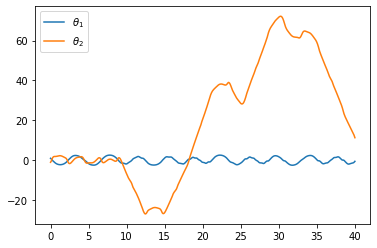

In [13]:
plt.plot(t, the1, label=r'$\theta_1$')
plt.plot(t, the2, label=r'$\theta_2$')
plt.legend()

In [14]:
def get_pos(t, the1, the2, L1, L2):
    x1 = L1 * np.sin(the1)
    y1 = -L1 * np.cos(the1) 
    x2 = x1 + L2 * np.sin(the2)
    y2 = y1 - L2 * np.cos(the2)
    return (x1, y1, x2, y2)

x1, y1, x2, y2 = get_pos(t, the1, the2, L1, L2)

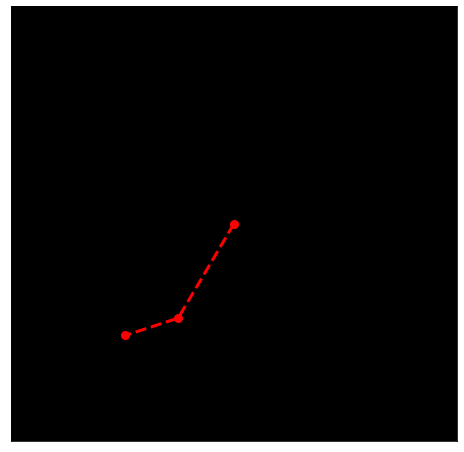

In [15]:
def animate(i):
    ln1.set_data([0, x1[i], x2[i]], [0, y1[i], y2[i]])

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.set_facecolor('k')
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
ln1, = plt.plot([], [], 'ro--', lw=3, markersize=8)
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)

ani = animation.FuncAnimation(fig, animate, range(len(t)), interval=50)
ani.save('pendulum.gif', writer=PillowWriter(fps=25))